In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
beta = 10
N = 100

XYHamiltonian = lambda x, r, l : np.cos(2*np.pi*(x-l)/N) + np.cos(2*np.pi*(x-r)/N)
WeirdHamiltonian = lambda x, r, l : np.cos(2*np.pi*x/N - np.arctan2(np.sin(2*np.pi*l/N) + np.sin(2*np.pi*r/N), np.cos(2*np.pi*l/N) + np.cos(2*np.pi*r/N)))

weights = np.array([
        [
            [ 
                np.exp(beta * WeirdHamiltonian(x,r,l))
                for l in range(N)
            ]
            for r in range(N)
        ]
        for x in range(N)
    ])

Z = np.sum(weights, axis=0)

probs = weights / Z

def combine_densities(fl, fr):
    f = np.transpose(fl) @ weights @ fr
    return f / np.sum(f)

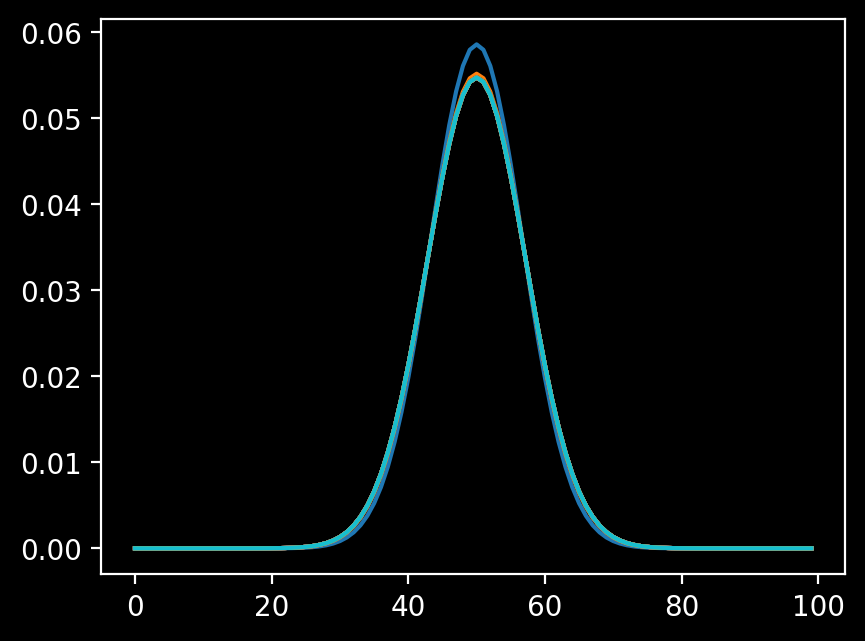

In [8]:
f = np.zeros(N)
f[N // 2] = 1

iterations_per_snapshot = 3
snapshots = 20
iteration_counter = iterations_per_snapshot
snapshot_counter = snapshots

while snapshot_counter > 0:
    f = combine_densities(f,f)
    iteration_counter -= 1

    if iteration_counter == 0:
        plt.plot(f)
        snapshot_counter -= 1
        iteration_counter = iterations_per_snapshot

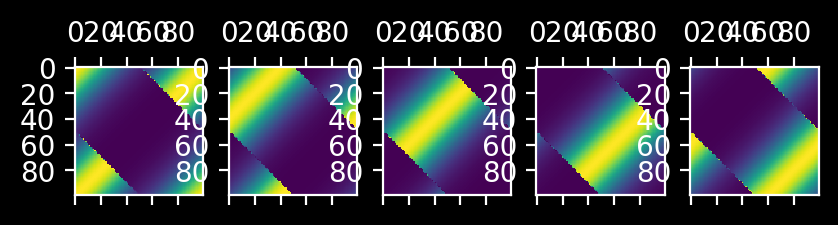

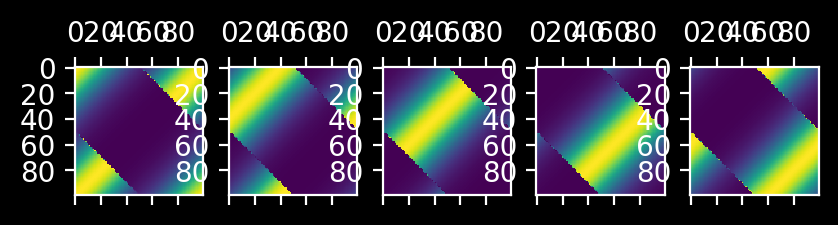

In [9]:
fig, axes = plt.subplots(1,5)
for i, ax in enumerate(axes):
    ax.matshow(weights[i * N // 5])

fig, axes = plt.subplots(1,5)
for i, ax in enumerate(axes):
    ax.matshow(probs[i * N // 5])